In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense ,Flatten,Input

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [4]:
in_layer=Input(shape=(28,28))
inputs=Flatten()(in_layer)
D1=Dense(100,activation="sigmoid",name="L1")(inputs)
D2=Dense(50,activation="sigmoid",name="L2")(D1)
D3=Dense(30,activation="sigmoid",name="L3")(D2)
out=Dense(10,activation="softmax",name="output")(D3)
model=Model(inputs=in_layer,outputs=out)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
L1 (Dense)                   (None, 100)               78500     
_________________________________________________________________
L2 (Dense)                   (None, 50)                5050      
_________________________________________________________________
L3 (Dense)                   (None, 30)                1530      
_________________________________________________________________
output (Dense)               (None, 10)                310       
Total params: 85,390
Trainable params: 85,390
Non-trainable params: 0
_________________________________________________________

In [6]:
from tensorflow.keras.datasets import mnist

In [7]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
model.compile(optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [10]:
y_train_hot=OneHotEncoder().fit_transform(y_train.reshape(-1,1)).todense()

In [11]:
output=model.fit(x_train,y_train_hot,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.8767 - accuracy: 0.7684
Epoch 2/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.4345 - accuracy: 0.8682
Epoch 3/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3744 - accuracy: 0.8855
Epoch 4/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3524 - accuracy: 0.8917
Epoch 5/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3240 - accuracy: 0.9010
Epoch 6/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3091 - accuracy: 0.9052
Epoch 7/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3007 - accuracy: 0.9061
Epoch 8/10
60000/60000 [==============================] - 4s 58us/sample - loss: 0.2949 - accuracy: 0.9099
Epoch 9/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2751 - accuracy: 0.9140
Epoch 10/10
60

In [12]:
y_test_hot=OneHotEncoder().fit_transform(y_test.reshape(-1,1)).todense()

In [13]:
model.evaluate(x_test,y_test_hot,verbose=0)

[0.2657967579424381, 0.9162]

(0, 1)

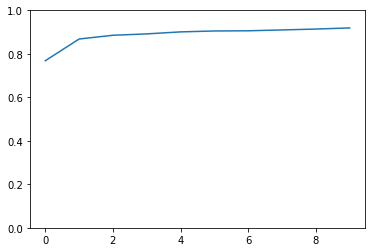

In [14]:
plt.plot(output.history["accuracy"])
plt.ylim(0,1)

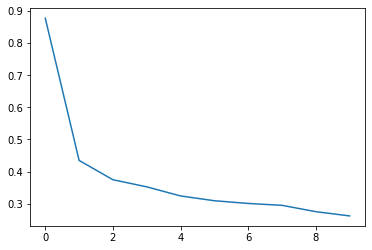

In [15]:
plt.plot(output.history["loss"])

In [50]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [51]:
x_test.shape

(10000, 28, 28)

In [48]:
model.predict(x_test[:10]).argmax(axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [20]:
from PIL import Image

In [31]:
data=Image.open("../thirtyfive/datasets/nums/three.jpeg")

In [32]:
#image=np.array(data)

In [34]:
img=data.resize(size=(28,28))

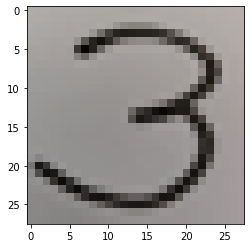

In [64]:
plt.imshow(img)

In [38]:
image=255-np.array(img).mean(axis=2)

In [60]:
model.predict(np.array(image))

ValueError: Error when checking input: expected input_1 to have 3 dimensions, but got array with shape (28, 28)